In [54]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
import pandas as pd
import statsmodels
import statsmodels.api as sm

In [56]:
#load data
data, meta = arff.loadarff('ECG5000_TRAIN.arff')
df = pd.DataFrame(data)

df = df[df['target'] == b'1'].copy() #keep only the first class
df.drop('target', axis=1, inplace=True) #drop the class number

In [57]:
print("Number of heartbeats of class 1 :",len(df))

Number of heartbeats of class 1 : 292


In [58]:
#we check that there are no missing values
if df.isna().any().any():
    print("There are missing values")
else:
    print("No missing values")


No missing values


In [59]:
#we check that there are no values set to 0
for i in range(len(df)):
    line = df.iloc[i].astype(float).tolist()
    for j in range(len(line)):
      if(line[j]==0.0):
        print(i)
        print(line[j])


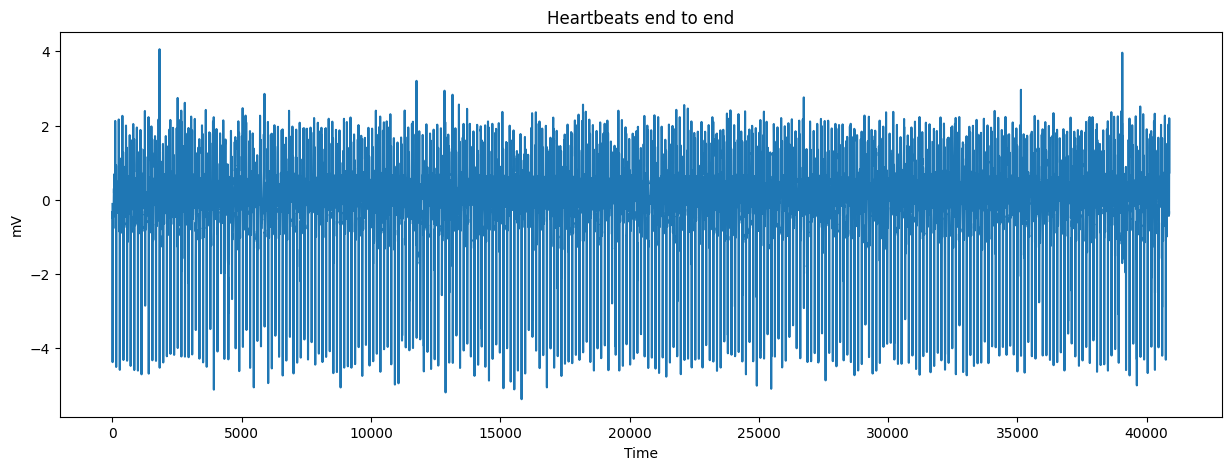

In [60]:
#we put the heartbeats end to end and visualise them.
plt.figure(figsize = (15,5))
ecg_end_to_end = []
for i in range(len(df)):
  line = df.iloc[i]
  ecg_end_to_end += line.astype(float).tolist()

plt.ylabel("mV")
plt.xlabel("Time")
plt.title("Heartbeats end to end")
plt.plot([i for i in range(len(ecg_end_to_end))],ecg_end_to_end)
plt.show()

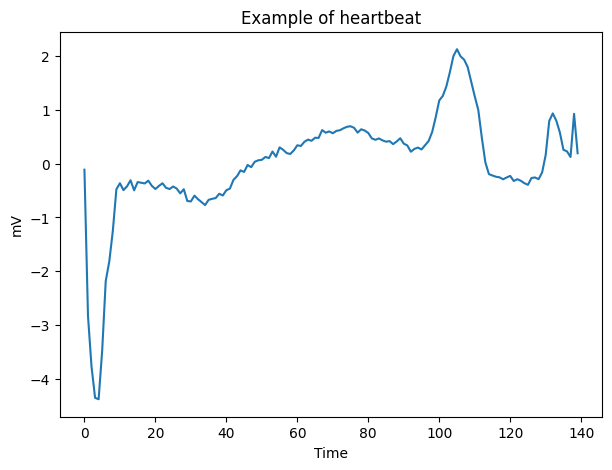

In [61]:
#example of one heartbeat
plt.figure(figsize = (7,5))
y = df.iloc[0].astype(float).tolist()
plt.ylabel("mV")
plt.xlabel("Time")
plt.title("Example of heartbeat")
plt.plot([i for i in range(len(y))],y)
plt.show()

In [62]:
slope, intercept = np.polyfit([i for i in range(len(y))], y, 1)
print("The coefficient of the slope for a linear interpolation is : ",slope)


The coefficient of the slope for a linear interpolation is :  0.014348404066888988


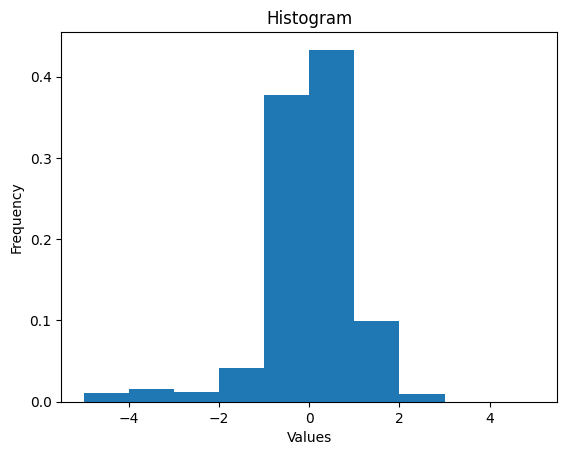

In [63]:
plt.hist(ecg_end_to_end,bins = 10,density = True, range=(-5,5))
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


We will only study ecg signals remaining between -5 and 3 mV.

In [64]:
## AR outlier detection

e = 1 #error between the signal and the AR prediction
ecg = ecg_end_to_end.copy()
p = 140 #we take a AR(140)

#computation of the AR coefficients
r = statsmodels.tsa.stattools.levinson_durbin(ecg_end_to_end, nlags=p, isacov=False)

coefs =[1] + r[1].tolist()
wrong_indexes = []
predicted_values = []
for i in range(p,len(ecg)): #for every point in the signal, we compute the AR prediction and compare it to the value
  predicted_value = np.array(ecg[i-p:i])@np.array(r[1])
  if(np.abs(predicted_value - ecg[i]) > e):
    wrong_indexes.append(i)
    predicted_values.append(predicted_value)

In [65]:
w = [0]*2627
n = 0
for i in range(len(wrong_indexes)):
  w[(wrong_indexes[i])//140]+= 1

for i in range(1,len(w)):
  if(w[i]== 0):
    print("Signal {} does not seem to have abnormalities according to the AR detection.".format(i))
    n +=1
  if(n==2):
    break

Signal 7 does not seem to have abnormalities according to the AR detection.
Signal 53 does not seem to have abnormalities according to the AR detection.


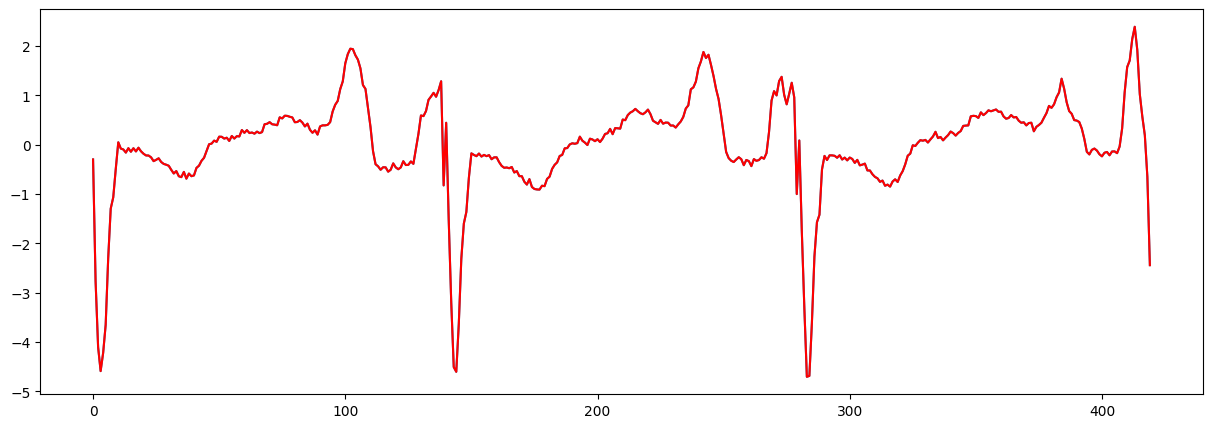

In [69]:
#exam of the data to check that the values are between -5 mV and 3 mV.
plt.figure(figsize = (15,5))
n1 = 6*140
n2 = 9*140
plt.plot([i for i in range(len(ecg_end_to_end[n1:n2]))],ecg_end_to_end[n1:n2])
plt.plot([i for i in range(len(ecg_end_to_end[n1:n2]))],ecg[n1:n2],color="r")
plt.show()

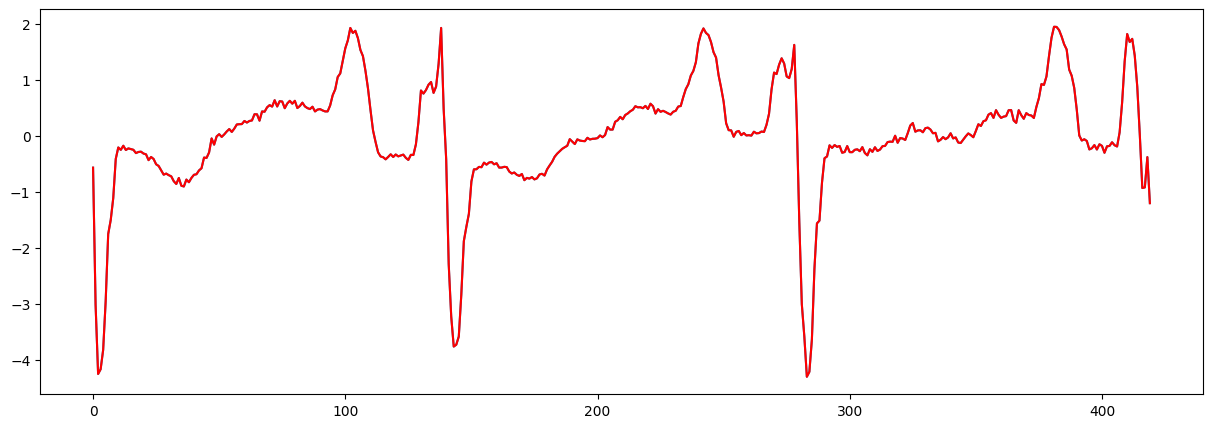

In [68]:
#exam of the data to check that the values are between -5 mV and 3 mV.
plt.figure(figsize = (15,5))
n1 = 52*140
n2 = 55*140
plt.plot([i for i in range(len(ecg_end_to_end[n1:n2]))],ecg_end_to_end[n1:n2])
plt.plot([i for i in range(len(ecg_end_to_end[n1:n2]))],ecg[n1:n2],color="r")
plt.show()